# II. Programming and critical analysis

### 5)

Carregar e preparar os dados

In [3]:
import pandas as pd

df = pd.read_csv('rent.csv')

X = df[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'interest_level']].values
y = df['price'].values

Configurar 5-fold Cross Validation

In [4]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

linear_mae_scores = []
mlp_no_activation_mae_scores = []
mlp_relu_mae_scores = []

Treinar modelos e avaliar com cross validation

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    models = [
        LinearRegression(),
        MLPRegressor(hidden_layer_sizes=(5, 5), activation='identity', 
                     solver='lbfgs', max_iter=1000, random_state=42),
        MLPRegressor(hidden_layer_sizes=(5, 5), activation='relu',
                     solver='lbfgs', max_iter=1000, random_state=42)
    ]
    
    results = [linear_mae_scores, mlp_no_activation_mae_scores, mlp_relu_mae_scores]
    
    for i in range(len(models)):
        models[i].fit(X_train_scaled, y_train)
        y_pred = models[i].predict(X_test_scaled)
        mae = mean_absolute_error(y_test, y_pred)
        results[i].append(mae)

Boxplot

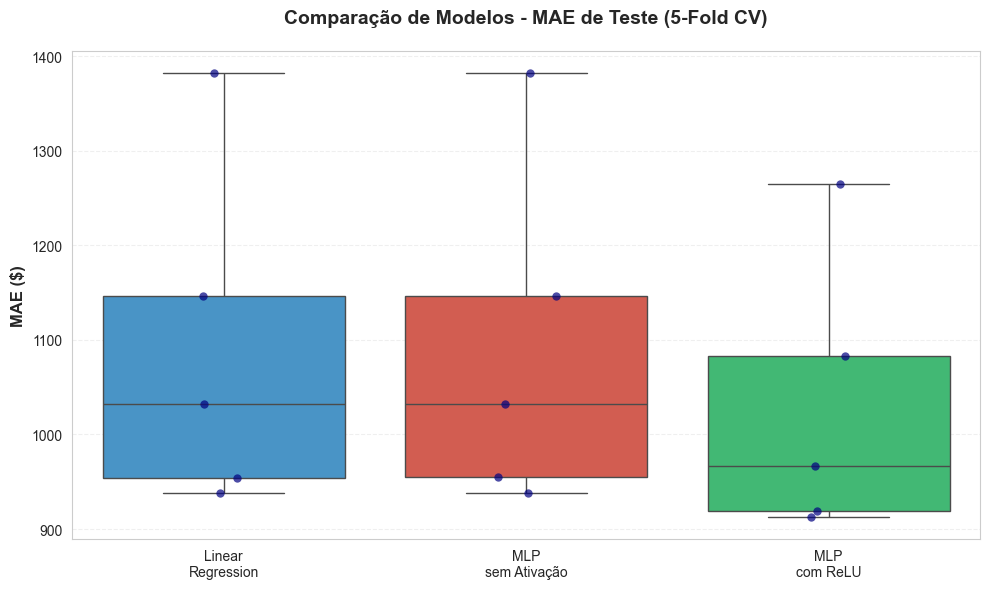

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'MAE': np.concatenate([linear_mae_scores, mlp_no_activation_mae_scores, mlp_relu_mae_scores]),
    'Modelo': (['Linear\nRegression'] * len(linear_mae_scores) +
               ['MLP\nsem Ativação'] * len(mlp_no_activation_mae_scores) +
               ['MLP\ncom ReLU'] * len(mlp_relu_mae_scores))
})

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Modelo', y='MAE', data=data,
    hue='Modelo',
    palette=['#3498db', '#e74c3c', '#2ecc71'],
)
sns.stripplot(
    x='Modelo', y='MAE', data=data,
    color='navy', edgecolor='black', size=6, jitter=0.1, alpha=0.7
)

plt.xlabel('')
plt.ylabel('MAE ($)', fontsize=12, fontweight='bold')
plt.title('Comparação de Modelos - MAE de Teste (5-Fold CV)', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### 6)

In [78]:
diff_linear_mlp_relu = ((np.mean(linear_mae_scores) - np.mean(mlp_relu_mae_scores)) / 
        np.mean(linear_mae_scores) * 100)

diff_linear_mlp_no_activation = ((np.mean(linear_mae_scores) - np.mean(mlp_no_activation_mae_scores)) / 
        np.mean(linear_mae_scores) * 100)

print(f"""
As funções de ativação como ReLU são essenciais porque introduzem não-linearidade
na rede neural, permitindo que o modelo capture relações complexas entre as 
variáveis que um modelo linear não consegue representar. 

Observando os resultados do boxplot, o MLP com ReLU apresenta uma melhoria de 
{diff_linear_mlp_relu:.5f}% no MAE comparado com a regressão linear. Esta melhoria deve-se à 
capacidade do MLP de modelar interações não-lineares entre features como localização 
e número de quartos, que influenciam o preço de forma complexa.

Sem funções de ativação, um MLP com múltiplas camadas colapsa matematicamente 
numa única transformação linear, tornando-se equivalente à regressão linear. 
Isto pode ser confirmado pela melhoria calculada de {diff_linear_mlp_no_activation:.5f}%, que é praticamente zero.
        
No contexto de previsão de valores de rendas de imóveis, isto é importante
pois o valor não varia linearmente com a localização ou características do 
imóvel, existem thresholds e combinações entre características que 
modelos lineares não conseguem capturar adequadamente.
""")


As funções de ativação como ReLU são essenciais porque introduzem não-linearidade
na rede neural, permitindo que o modelo capture relações complexas entre as 
variáveis que um modelo linear não consegue representar. 

Observando os resultados do boxplot, o MLP com ReLU apresenta uma melhoria de 
5.61917% no MAE comparado com a regressão linear. Esta melhoria deve-se à 
capacidade do MLP de modelar interações não-lineares entre features como localização 
e número de quartos, que influenciam o preço de forma complexa.

Sem funções de ativação, um MLP com múltiplas camadas colapsa matematicamente 
numa única transformação linear, tornando-se equivalente à regressão linear. 
Isto pode ser confirmado pela melhoria calculada de -0.00121%, que é praticamente zero.

No contexto de previsão de valores de rendas de imóveis, isto é importante
pois o valor não varia linearmente com a localização ou características do 
imóvel, existem thresholds e combinações entre características que 
modelos lin

### 7)

Setup

In [ ]:
all_train_losses = []
all_val_losses = []

In [34]:
fold_num = 1
for train_idx, test_idx in kfold.split(X):
    X_train, X_val = X[train_idx], X[test_idx]
    y_train, y_val = y[train_idx], y[test_idx]
    
    scaler = StandardScaler()
    X_train_sclaed = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    

    mlp = MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='relu',
        solver='adam',
        max_iter=1,
        warm_start=True,
        random_state=42,
        learning_rate_init=0.001
    )
    
    train_losses = []
    val_losses = []
    
    max_iterations = 500
    for i in range(max_iterations):
        mlp.fit(X_train_sclaed, y_train)
        
        train_pred = mlp.predict(X_train_sclaed)
        val_pred = mlp.predict(X_val_scaled)
        
        train_loss = mean_squared_error(y_train, train_pred)
        val_loss = mean_squared_error(y_val, val_pred)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    fold_num += 1

In [19]:
all_train_losses = np.array(all_train_losses)
all_val_losses = np.array(all_val_losses)

mean_train_loss = np.mean(all_train_losses, axis=0)
mean_val_loss = np.mean(all_val_losses, axis=0)

std_train_loss = np.std(all_train_losses, axis=0)
std_val_loss = np.std(all_val_losses, axis=0)

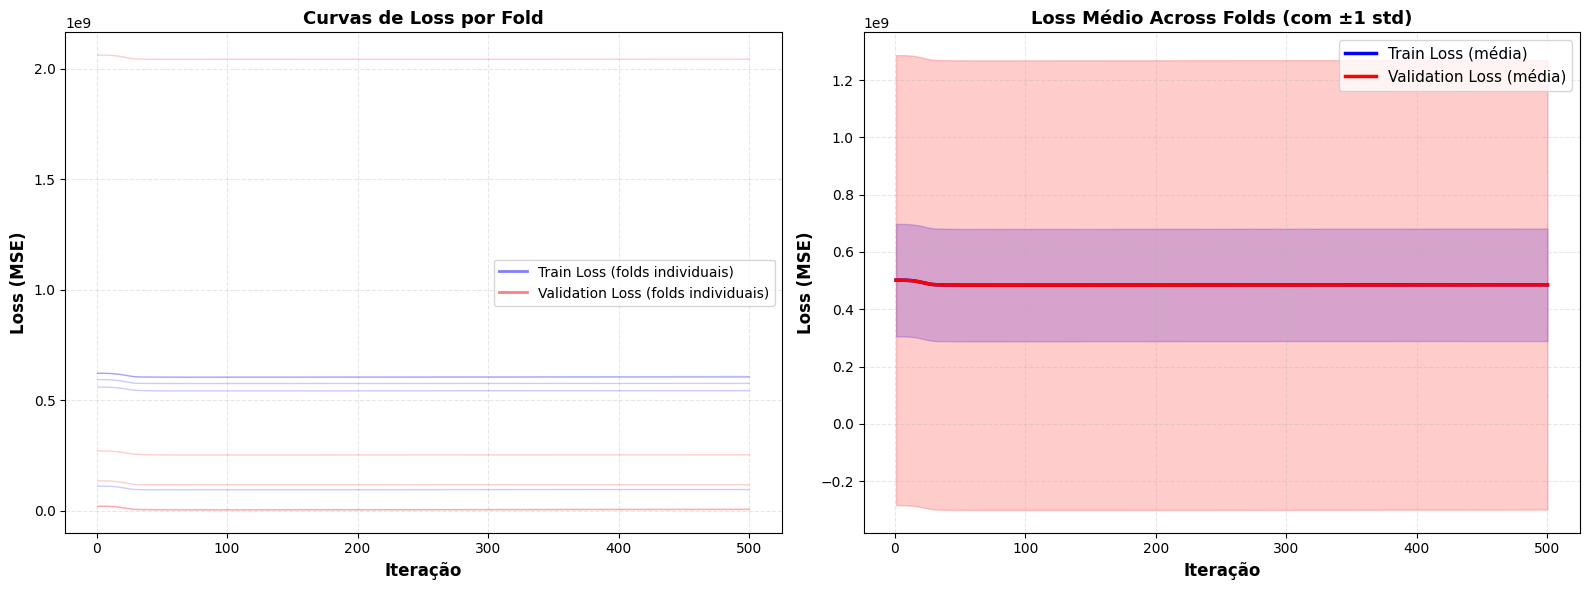

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
iterations = range(1, len(mean_train_loss) + 1)

for i in range(5):
    ax1.plot(iterations, all_train_losses[i], 
             color='blue', alpha=0.2, linewidth=1)
    ax1.plot(iterations, all_val_losses[i], 
             color='red', alpha=0.2, linewidth=1)

ax1.plot([], [], color='blue', alpha=0.5, linewidth=2, label='Train Loss (folds individuais)')
ax1.plot([], [], color='red', alpha=0.5, linewidth=2, label='Validation Loss (folds individuais)')

ax1.set_xlabel('Iteração', fontsize=12, fontweight='bold')
ax1.set_ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
ax1.set_title('Curvas de Loss por Fold', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3, linestyle='--')

ax2 = axes[1]

ax2.plot(iterations, mean_train_loss, color='blue', linewidth=2.5, label='Train Loss (média)')
ax2.fill_between(iterations, 
                  mean_train_loss - std_train_loss,
                  mean_train_loss + std_train_loss,
                  color='blue', alpha=0.2)

ax2.plot(iterations, mean_val_loss, color='red', linewidth=2.5, label='Validation Loss (média)')
ax2.fill_between(iterations,
                  mean_val_loss - std_val_loss,
                  mean_val_loss + std_val_loss,
                  color='red', alpha=0.2)

ax2.set_xlabel('Iteração', fontsize=12, fontweight='bold')
ax2.set_ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
ax2.set_title('Loss Médio Across Folds (com ±1 std)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11, loc='upper right')
ax2.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

Análise

In [32]:
final_train = mean_train_loss[-1]
final_val = mean_val_loss[-1]
gap_pct = ((final_val - final_train) / final_train) * 100
min_val_idx = np.argmin(mean_val_loss)

print(f"""
Train Loss final: {final_train:.2f}
Validation Loss final: {final_val:.2f}
Gap: {gap_pct:.5f}%
Melhor Val Loss: {mean_val_loss[min_val_idx]:.2f} (iteração {min_val_idx+1})

O modelo apresenta excelente generalização. 
O gap de {gap_pct:.5f}% entre train e validation loss indica que o modelo generaliza bem para dados ainda não vistos.

Olhando para as curvas de loss:
- Ambas as curvas convergem de forma similar, um comportamento ideal.
- A validation loss permanece estável após atingir o mínimo na iteração {min_val_idx+1}, indicando boa generalização.
""")


Train Loss final: 485417304.80
Validation Loss final: 485227066.95
Gap: -0.03919%
Melhor Val Loss: 484133550.78 (iteração 92)

O modelo apresenta excelente generalização. 
O gap de -0.03919% entre train e validation loss indica que o modelo generaliza bem para dados ainda não vistos.

Olhando para as curvas de loss:
- Ambas as curvas convergem de forma similar, um comportamento ideal.
- A validation loss permanece estável após atingir o mínimo na iteração 92, indicando boa generalização.

